In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats as scps
from ipywidgets import interact

from colorama import Fore

In [2]:
rcParams['figure.figsize'] = (20, 6)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Discrete distributions

## Uniform distribution: $X \sim U(a, b)$

$X$ is the random variable that takes on discrete values between $a$ and $b$ with equal probability.

### Probability
$P(X=k)=\frac{1}{b-a+1}\;\textrm{ for } k = a, ..., b$

### Expectation
$E(X) = \frac{a+b}{2}$

### Variance
$V(X) = \frac{(b-a+1)^2 - 1}{12}$

In [3]:
@interact
def plot_uniform(a=(1,5), b=(5,10)):
    k = np.arange(a, b+1)
    pmf = np.ones_like(k) / (b - a + 1)
    plt.xticks(np.arange(a,b+1))
    sns.barplot(k, pmf, color='cadetblue')
    text = f'E(X) = {(a+b)/2:.2f}\nV(X) = {((b-a+1)**2-1)/12:.2f}'
    plt.text(0.01, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    plt.grid(ls='dashed')
    plt.title(f'Uniform distribution from {a} to {b}', fontsize=25)
    plt.show()

interactive(children=(IntSlider(value=3, description='a', max=5, min=1), IntSlider(value=7, description='b', m…

## Binomial distribution: $X \sim B(n, p)$

$X$ is the random variable that counts the number of successes from $n$ independent attempts with the same chance for success $p$.

### Probability
$P(X=k)={n \choose k} p^k (1-p)^{n-k}\;\textrm{ for } k = 0, 1, 2, ..., n$

### Expectation
$E(X) = np$

### Variance
$V(X) = np(1-p)$

In [4]:
from scipy.stats import binom

In [5]:
@interact
def plot_binom(n=(0,30), p=(0.0,1.0, 0.01)):
    dist = binom(n, p)
    x = np.arange(n+1)
    pmf = dist.pmf(x)
    sns.barplot(x, pmf, color='cadetblue')
    text = f'E(X) = {n*p:.2f}\nV(X) = {n*p*(1-p):.2f}'
    plt.text(0.01, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    plt.title(f'Binomial Distribution with n = {n}, p = {p}', fontsize=25)
    plt.grid(ls='dashed')
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30), FloatSlider(value=0.5, description='p', ma…

## Hypergeometric distribution: $X \sim HG(M, n, N)$

$X$ is the random variable that counts the number of special elements taken from choosing $N$ times without returning from a finite population of size $M$ which has $n$ specials.

### Probability
$P(X=k)=\large{\frac{{n \choose k}{M-n \choose N-k}}{M \choose N}} \;\textrm{ for } k =\textrm{max}(0,N-(M-n)),...,\textrm{min}(N, n)$

### Expectation
$E(X) = N\frac{n}{M}$

### Variance
$V(X) = \frac{M-N}{M-1}N\frac{n}{M}(1 - \frac{n}{M})$

In [6]:
from scipy.stats import hypergeom

In [7]:
@interact
def plot_hypergeom(M=(10, 50), n=(0,50), N=(0, 50)):
    if (M < n or M < N):
        print(Fore.RED + 'Error: Both n and N must be less than or equal to M')
        return
    dist = hypergeom(M, n, N)
    k = np.arange(max(0, N-M+n), min(n, N)+1)
    
    pmf = dist.pmf(k)
    sns.barplot(k, pmf, color='cadetblue')
    text = f'E(X) = {N*n/M:.2f}\nV(X) = {(M-N)/(M-1)*N*n/M*(1-n/M):.2f}'
    plt.text(0.01, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    plt.title(f'Hypergeometric distribution with {M} elements, {n} specials, and choosing {N} times.', 
              fontsize=20)
    plt.grid(ls='dashed')
    plt.show()

interactive(children=(IntSlider(value=30, description='M', max=50, min=10), IntSlider(value=25, description='n…

## Geometric distribution: $X \sim G(p)$

$X$ is the random variable that counts the number of attempts up until and including the first success in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)=(1-p)^{k-1}p\;\textrm{ for } k = 1, 2, ...$

### Expectation
$E(X) = \frac{1}{p}$

### Variance
$V(X) = \frac{1-p}{p^2}$

In [8]:
from scipy.stats import geom

In [23]:
@interact
def plot_geometric(p=(0, 1, 0.01)):
    dist = geom(p)
    k = np.arange(1, 50)
    pmf = dist.pmf(k)
    sns.barplot(k, pmf, color='cadetblue')
    plt.xticks(rotation=55)
    if p != 0:
        text = f'E(X) = {1/p:.2f}\nV(X) = {(1-p)/p**2:.2f}'
        plt.text(0.88, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
            verticalalignment='top', bbox=props)
    plt.grid(ls='dashed')
    plt.title(f"Geometric distribution with parameter p = {p}", fontsize=25)

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Negative binomial distribution: $X \sim NB(n,p)$

$X$ is the random variable that counts the number of attempts up until and including the $n^{th}$ success, in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)=\large{{k-1 \choose n-1} p^n (1-p)^{k-n}} \;\textrm{ for } k = n, n+1, n+2, ...$

### Expectation
$E(X) = \frac{n}{p}$

### Variance
$V(X) = n\frac{1-p}{p^2}$

In [10]:
from scipy.stats import nbinom

In [11]:
@interact
def plot_negbinom(n=(0,100), p=(0,1,0.01)):
    dist = nbinom(n, p, loc=n)
    k = np.arange(n, n+70)
    pmf = dist.pmf(k)
    plt.title(f"Negative binomial distribution with parameters n = {n}, p = {p}", fontsize=25)
    plt.xticks(rotation=55)
    plt.grid(ls='dashed')
    sns.barplot(k, pmf, color='cadetblue')
    if p != 0:
        text = f'E(X) = {n/p:.2f}\nV(X) = {n*(1-p)/p**2:.2f}'
        plt.text(0.01, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
            verticalalignment='top', bbox=props)
    plt.show()

interactive(children=(IntSlider(value=50, description='n'), FloatSlider(value=0.0, description='p', max=1.0, s…

### Poisson distribution: $X \sim P(\lambda)$

$X$ is the random variable that counts the number of appearances in a unit that come at a rate of $\lambda$ per unit, independently from each other.

### Probability
$P(X=k) = \large{e^{-\lambda}\frac{\lambda^k}{k!}} \;\textrm{ for } k = 0, 1, 2, ...$

### Expectation
$E(X) = \lambda$

### Variance
$V(X) = \lambda$

In [12]:
from scipy.stats import poisson

In [13]:
@interact
def plot_poisson(λ=(0,20,0.1)):
    dist = poisson(λ)
    k = np.arange(0, int(λ)+21)
    pmf = dist.pmf(k)
    plt.title(f"Poisson distribution with λ = {λ}", fontsize=25)
    plt.grid(ls='dashed')
    sns.barplot(k, pmf, color='cadetblue')
    text = f'E(X) = {λ}\nV(X) = {λ}'
    plt.text(0.88, 0.95, text, transform=plt.gca().transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='λ', max=20.0), Output()), _dom_classes=('widget-int…

# Continuous Distributions

It's important to note that for continuous distributions the probability to get a single exact value is zero which is why we take the integral (area under the curve/pdf) for an interval that includes the value we want in order to get the probability.

## Normal Distribution: $X \sim N(\mu, \sigma^2)$

### Probability Density function
$\large{f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}}$

### Expectation
$E(X) = \mu$

### Variance
$V(X) = \sigma^2$

### Cumulative Density Function
$P(X \le k) = \int_{-\infty}^k f(x)dx$

note: There is a special notation for $X \sim N(0, 1)$ in which we say $X$ follows a __standard normal__ distribution. We also use $\Phi$ i.e. $\Phi(x) = P(X \le x)$ to denote the CDF of a standard normal distribution.

In [14]:
from scipy.stats import norm

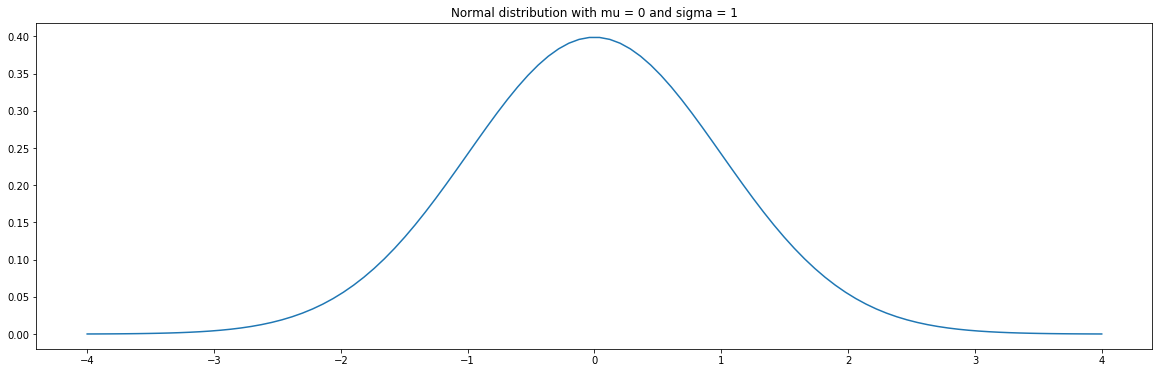

In [15]:
mu, sigma = 0, 1
dist = norm(mu, sigma)

x = np.linspace(-4, 4, 100)
pdf = dist.pdf(x)

plt.plot(x, pdf)

plt.title(f"Normal distribution with mu = {mu} and sigma = {sigma}");

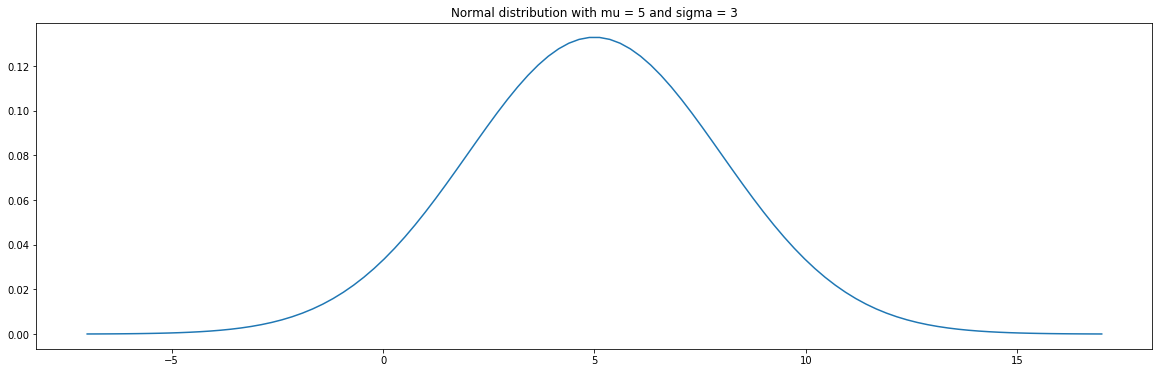

In [16]:
mu, sigma = 5, 3
dist = norm(mu, sigma)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = dist.pdf(x)

plt.plot(x, pdf)

plt.title(f"Normal distribution with mu = {mu} and sigma = {sigma}");